In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(r"/content/Alphabets_data.csv")

In [5]:
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [6]:
data.duplicated().sum()

np.int64(1332)

In [7]:
data.drop_duplicates(inplace  = True)
data.reset_index(drop = 'first', inplace = True)

In [8]:
data.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


<Axes: >

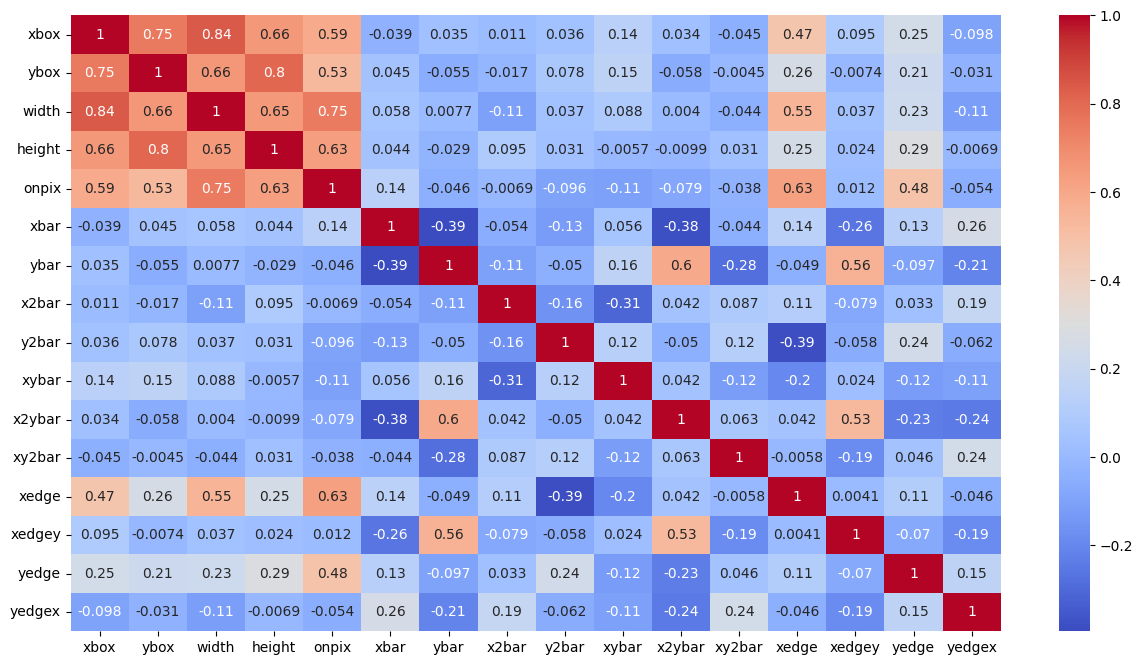

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')


In [12]:
le = LabelEncoder()
data['letter'] = le.fit_transform(data['letter'])

In [13]:
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,19,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
18664,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
18665,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
18666,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [14]:
minmax = MinMaxScaler()
encode_col = data.drop('letter', axis = 1).columns
data[encode_col] = minmax.fit_transform(data[encode_col])

In [15]:
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,0.133333,0.533333,0.200000,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333,0.000000,0.533333
1,8,0.333333,0.800000,0.200000,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333,0.266667,0.666667
2,3,0.266667,0.733333,0.400000,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667,0.200000,0.600000
3,13,0.466667,0.733333,0.400000,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667,0.133333,0.533333
4,6,0.133333,0.066667,0.200000,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667,0.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,19,0.333333,0.533333,0.466667,0.466667,0.466667,0.466667,0.600000,0.266667,0.533333,0.466667,0.466667,0.533333,0.200000,0.666667,0.533333,0.400000
18664,3,0.133333,0.133333,0.200000,0.200000,0.133333,0.466667,0.466667,0.466667,0.400000,0.400000,0.400000,0.266667,0.133333,0.533333,0.200000,0.466667
18665,2,0.466667,0.666667,0.533333,0.533333,0.266667,0.266667,0.533333,0.400000,0.600000,0.800000,0.600000,0.866667,0.133333,0.600000,0.200000,0.466667
18666,19,0.400000,0.600000,0.400000,0.466667,0.333333,0.400000,0.733333,0.200000,0.466667,0.733333,0.600000,0.333333,0.133333,0.800000,0.133333,0.266667


In [16]:
x = data.drop('letter', axis = 1)
y = data[['letter']]

In [17]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [18]:
def build_model(hp):  # `hp` is passed automatically by Keras Tuner during search
    model = Sequential()
    # Input layer
    model.add(Dense(
        hp.Int('units_input', min_value=64, max_value=256, step=32),  # Search for units
        activation='relu',
        input_dim=x_train.shape[1]
    ))

    # Hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):  # Search for number of layers (1 to 3 layers)
        model.add(Dense(
            hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),  # Search for units per layer
            activation='relu'
        ))

        if hp.Boolean(f'dropout_{i}'):  # Search for whether to use dropout or not
            model.add(Dropout(rate=hp.Float(f'dropout_rate_{i}', 0.1, 0.5, step=0.1)))  # Search for dropout rate

    # Output layer
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))

    # Compile model with search for learning rate
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[0.1, 0.01, 1.0])),  # Search learning rate
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [35]:
# Initialize Keras Tuner with Random Search
tuner = kt.RandomSearch(
    build_model,  # The function that defines the model architecture
    objective='val_accuracy',  # What metric we want to optimize
    max_trials=10,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of times to train the model for each trial
    project_name='ann_tuning'  # Name of the project
)

# Perform the search for the best hyperparameters
tuner.search(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Reloading Tuner from ./ann_tuning/tuner0.json


In [36]:
best_model = tuner.get_best_hyperparameters(num_trials=1)[0]

In [22]:
print(best_model.values)

{'units_input': 160, 'num_layers': 1, 'units_0': 128, 'dropout_0': True, 'learning_rate': 0.01, 'units_1': 64, 'dropout_1': False, 'dropout_rate_0': 0.4, 'dropout_rate_1': 0.5, 'units_2': 96, 'dropout_2': True}


In [23]:
def train_ann(x_train, x_test, x_val, y_train, y_val, y_test):
    # Build the ANN model
    model = Sequential()
    model.add(Dense(128, input_dim = x_train.shape[1], activation='relu')) # Input layer
    model.add(Dense(64, activation='relu'))  # Hidden layer 1
    model.add(Dense(32, activation='relu'))  # Hidden layer 2
    model.add(Dense(16, activation='relu'))  # Hidden layer 3
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer


    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # For integer-encoded labels
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train, epochs = 30, batch_size = 32,
                        validation_data=(x_val, y_val))

    # Print final test accuracy
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f"Test Loss: {loss}")
    print(f"Test Accuracy: {accuracy}")

    y_pred_probs_1 = model.predict(x_test)
    y_pred_1 = np.argmax(y_pred_probs_1, axis=1)

    print(classification_report(y_test, y_pred_1))

    return model, history


In [24]:
ann_model = train_ann(x_train, x_test, x_val, y_train, y_val, y_test)

Epoch 1/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1384 - loss: 2.9386 - val_accuracy: 0.4143 - val_loss: 1.9038
Epoch 2/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4535 - loss: 1.7956 - val_accuracy: 0.5189 - val_loss: 1.5690
Epoch 3/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5319 - loss: 1.5417 - val_accuracy: 0.5507 - val_loss: 1.4823
Epoch 4/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5652 - loss: 1.4245 - val_accuracy: 0.5943 - val_loss: 1.3456
Epoch 5/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6069 - loss: 1.3270 - val_accuracy: 0.5943 - val_loss: 1.3237
Epoch 6/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6180 - loss: 1.2378 - val_accuracy: 0.6464 - val_loss: 1.1877
Epoch 7/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6539 - loss: 1.1705 - val_accuracy: 0.6607 - val_loss: 1.1145
Epoch 8/30
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6661 - loss: 1.0949 - val_accuracy: 0.

In [27]:
best_ann= build_model(best_model)

# Summarize the model architecture
best_ann.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 160)            │         2,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,682 (104.23 KB)

 Trainable params: 26,682 (104.23 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
best_ann.fit(x_train, y_train, epochs=25, validation_data=(x_val, y_val))

Epoch 1/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2730 - loss: 2.3570 - val_accuracy: 0.6075 - val_loss: 1.1905
Epoch 2/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5683 - loss: 1.3475 - val_accuracy: 0.6675 - val_loss: 1.0086
Epoch 3/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6239 - loss: 1.1670 - val_accuracy: 0.7361 - val_loss: 0.8236
Epoch 4/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6655 - loss: 1.0215 - val_accuracy: 0.7425 - val_loss: 0.8081
Epoch 5/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6815 - loss: 0.9729 - val_accuracy: 0.7811 - val_loss: 0.6883
Epoch 6/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7048 - loss: 0.9157 - val_accuracy: 0.7714 - val_loss: 0.7088
Epoch 7/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7075 - loss: 0.8915 - val_accuracy: 0.7929 - val_loss: 0.6236
Epoch 8/25
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7319 - loss: 0.8362 - val_accuracy: 0.

In [29]:
loss1, acc = best_ann.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc}")

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8727 - loss: 0.4121
Test Accuracy: 0.8679043054580688


In [30]:
y_pred = best_ann.predict(x_test)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [31]:
y_pred_probs = best_ann.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [32]:
np.argmax(y_pred_probs, axis = 1)

array([10, 19,  5, ..., 18,  6, 16])

In [33]:
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       111
           1       0.72      0.85      0.78       123
           2       0.89      0.81      0.85       121
           3       0.82      0.89      0.85       114
           4       0.87      0.80      0.83       105
           5       0.79      0.87      0.83       116
           6       0.87      0.77      0.82       119
           7       0.73      0.86      0.79        95
           8       0.93      0.89      0.91        93
           9       0.95      0.86      0.90       105
          10       0.83      0.84      0.83       122
          11       0.97      0.96      0.97       112
          12       0.90      0.94      0.92        95
          13       0.91      0.91      0.91        95
          14       0.77      0.90      0.83        83
          15       0.96      0.79      0.87       136
          16       0.90      0.90      0.90       103
          17       0.65    